<a href="https://colab.research.google.com/github/Kartikay15/Trading_Bot/blob/main/ProphetForecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python
import pandas as pd
from prophet import Prophet

In [3]:
data = pd.read_csv('GOOG.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-10,51.752499,52.422501,51.164501,51.977501,51.977501,36154000
1,2018-12-11,52.824501,53.029999,51.992001,52.587502,52.587502,27894000
2,2018-12-12,53.400002,54.082500,53.139500,53.183998,53.183998,30476000
3,2018-12-13,53.403500,53.987999,52.696499,53.095001,53.095001,26596000
4,2018-12-14,52.499001,53.130001,52.039501,52.105000,52.105000,33732000
...,...,...,...,...,...,...,...
1254,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
1255,2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19235100
1256,2023-12-06,132.899994,133.309998,131.309998,131.429993,131.429993,16360600
1257,2023-12-07,136.600006,140.000000,136.229996,138.449997,138.449997,38419400


In [5]:
data = data[['Date','Close']]
data.columns = ['ds','y']

In [6]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg89ibe5v/q98g_rm8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg89ibe5v/7egb_4_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76285', 'data', 'file=/tmp/tmpg89ibe5v/q98g_rm8.json', 'init=/tmp/tmpg89ibe5v/7egb_4_c.json', 'output', 'file=/tmp/tmpg89ibe5v/prophet_modelizs3jpmx/prophet_model-20231210083705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:37:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:37:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
future = model.make_future_dataframe(periods = 365)
future.tail()

,ds
1619,2024-12-03
1620,2024-12-04
1621,2024-12-05
1622,2024-12-06
1623,2024-12-07


In [18]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1619,2024-12-03,190.418364,159.314574,224.227552
1620,2024-12-04,190.378032,159.542872,224.138828
1621,2024-12-05,190.363291,158.043380,222.672816
1622,2024-12-06,190.201966,158.231921,224.622269
1623,2024-12-07,187.480953,155.740370,220.906094


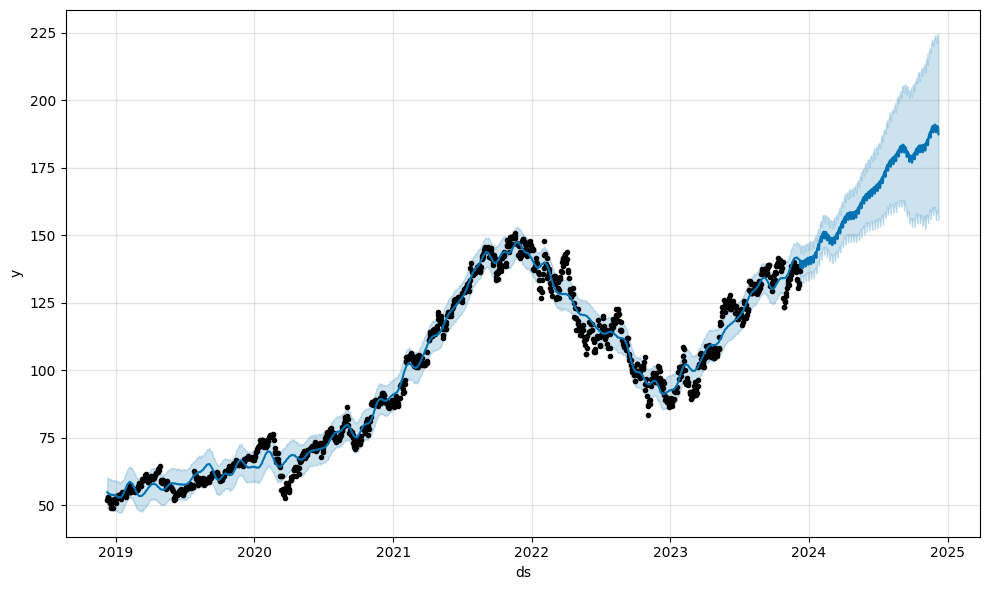

In [19]:
fig1 = model.plot(forecast)

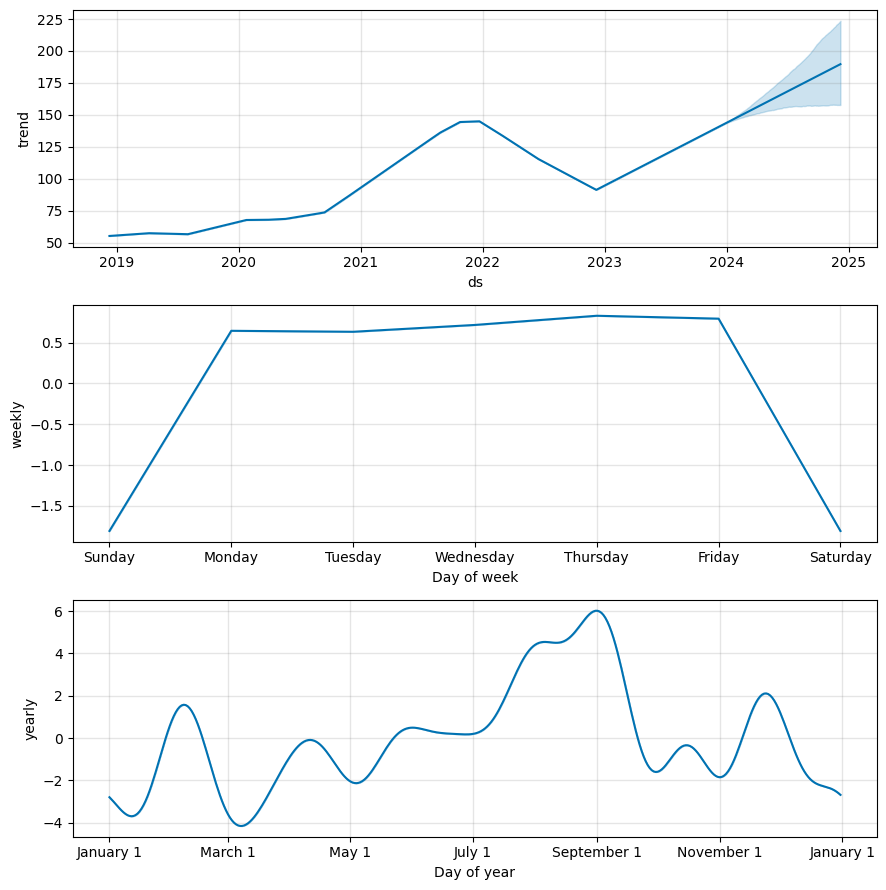

In [20]:
fig2 = model.plot_components(forecast)

In [21]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [22]:
plot_components_plotly(model, forecast)